<a href="https://colab.research.google.com/github/Valerie231/ML_homeworks/blob/main/HW_2_5_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Notebooks/

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [4]:
df = pd.read_csv('cars.csv')

In [5]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [7]:
df[['Brand', 'Model','Fuel_Type','Transmission','Owner_Type']].apply(pd.unique)

Brand           [Toyota, Honda, Ford, Maruti, Hyundai, Tata, M...
Model           [Corolla, Civic, Mustang, Swift, Sonata, Nexon...
Fuel_Type                                        [Petrol, Diesel]
Transmission                                  [Manual, Automatic]
Owner_Type                                 [First, Second, Third]
dtype: object

В наборі даних 8 числових і 5 категоріальних колонок з них:
- 2 бінарні (мають лише 2 значення): Fuel_Type, Transmission
- 2 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку: Brand, Model
- 1 колонка, в якій можна встановити відношення порядку (First<Second<Third): Owner_Type

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [8]:
from sklearn.model_selection import train_test_split

In [89]:
inputs, targets = df.drop(columns=['Price', 'Car_ID']), df.Price

In [90]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [91]:
df.Fuel_Type.value_counts(), df.Transmission.value_counts()

(Fuel_Type
 Petrol    52
 Diesel    48
 Name: count, dtype: int64,
 Transmission
 Automatic    57
 Manual       43
 Name: count, dtype: int64)

In [92]:
X_train['Fuel_Type_Code'] = [1 if x=='Petrol' else 0 for x in X_train['Fuel_Type']]
X_test['Fuel_Type_Code'] = [1 if x=='Petrol' else 0 for x in X_test['Fuel_Type']]

In [93]:
transmission_codes = {'Automatic': 1, 'Manual': 0}
X_train['Transmission_Code'] = X_train.Transmission.map(transmission_codes)
X_test['Transmission_Code'] = X_test.Transmission.map(transmission_codes)

In [94]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])

one_hot = enc.transform(X_train[['Brand']]).toarray()
X_train[enc.categories_[0]] = one_hot

one_hot = enc.transform(X_test[['Brand']]).toarray()
X_test[enc.categories_[0]] = one_hot

In [95]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

In [16]:
X_train.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [96]:
input_cols = ['Car_ID',	'Model', 	'Year',	'Kilometers_Driven', 'Fuel_Type_Code',	'Transmission_Code', 'Owner_Type_Codes'] + enc.categories_[0].tolist()

Очікуваний результат після трансформацій:

In [97]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [98]:
data = pd.concat([X_train.select_dtypes(exclude = 'object'), y_train], axis = 1)

corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
Year,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.233769
Kilometers_Driven,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,-0.083951
Mileage,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.638404
Engine,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.710561
Power,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,0.849137
Seats,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,0.000979
Fuel_Type_Code,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,0.066164,-0.008336,0.125010,0.281122,-0.110782
Transmission_Code,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886,0.680731
Audi,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,-0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,0.328858
BMW,0.202517,-0.247042,-0.134105,0.287119,0.372652,-0.108079,-0.048475,0.283188,-0.118678,1.000000,-0.126761,-0.091928,-0.101380,-0.081680,-0.091928,-0.126761,-0.134568,-0.118678,-0.110250,0.009076,0.477522


In [99]:
corr[abs(corr)>0.5][['Price']].style.background_gradient(cmap='coolwarm')

,Price
Year,nan
Kilometers_Driven,nan
Mileage,-0.638404
Engine,0.710561
Power,0.849137
Seats,nan
Fuel_Type_Code,nan
Transmission_Code,0.680731
Audi,nan
BMW,nan


Mileage,	Engine,	Power, Transmission_Code correlate with Price more than 0.5

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [100]:
X_train = X_train.select_dtypes(exclude = 'object')
X_test = X_test.select_dtypes(exclude = 'object')

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Створюємо і одразу тренуємо модель
model = LinearRegression().fit(X_train, y_train)

# Робимо передбачення моделлю
predictions = model.predict(X_train)

# Разуємо лосс
loss = mean_squared_error(y_train, predictions, squared=False)
print('Loss:', loss)

Loss: 210342.8016204638


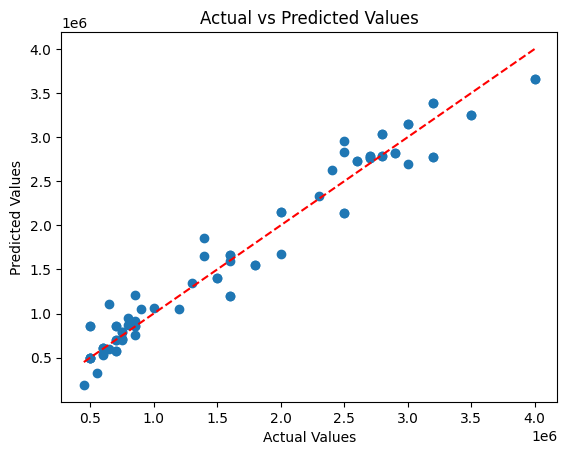

In [102]:
plt.scatter(y_train, predictions)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

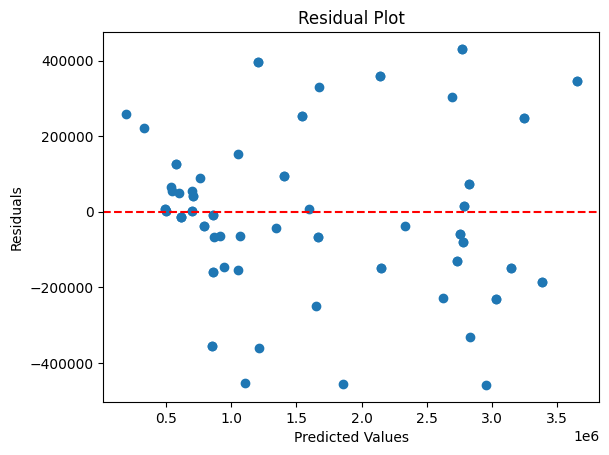

In [103]:
residuals = y_train - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [104]:
predictions = model.predict(X_test)

loss = mean_squared_error(y_test, predictions, squared=False)
print('Loss:', loss)

Loss: 259601.2654272335


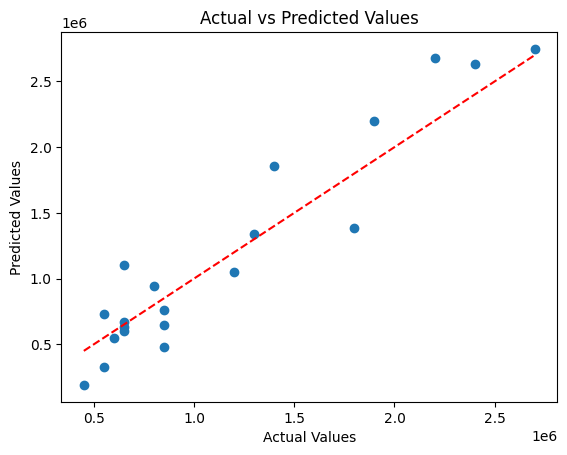

In [105]:
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

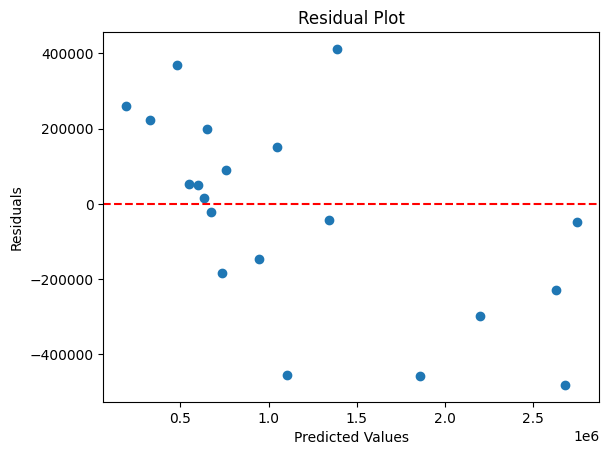

In [106]:
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Модель не дуже якісна, оскільки у нас великий Loss і передбачені значення погано відображають справжні.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [107]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numeric_cols=['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats']
scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])
scaled_inputs_train = scaler.transform(X_train[numeric_cols])
scaled_inputs_test = scaler.transform(X_test[numeric_cols])

In [108]:
cat_cols = ['Fuel_Type_Code', 'Transmission_Code', 'Audi', 'BMW', 'Ford',
       'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota',
       'Volkswagen', 'Owner_Type_Codes']
categorical_data_train = X_train[cat_cols].values
categorical_data_test = X_test[cat_cols].values

In [109]:
inputs_train = np.concatenate((scaled_inputs_train, categorical_data_train), axis=1)
inputs_test = np.concatenate((scaled_inputs_test, categorical_data_test), axis=1)

In [110]:
column_names = numeric_cols + cat_cols
inputs_df_train = pd.DataFrame(inputs_train, columns=column_names)
inputs_df_test = pd.DataFrame(inputs_test, columns=column_names)

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Створюємо і одразу тренуємо модель
model = LinearRegression().fit(inputs_df_train, y_train)

# Робимо передбачення моделлю
predictions = model.predict(inputs_df_train)

# Разуємо лосс
loss = mean_squared_error(y_train, predictions, squared=False)
print('Loss:', loss)

Loss: 210342.80162046402


In [112]:
# Робимо передбачення моделлю
predictions = model.predict(inputs_df_test)

# Разуємо лосс
loss = mean_squared_error(y_test, predictions, squared=False)
print('Loss:', loss)

Loss: 259601.2654272347


In [125]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
20,1,1.604276e+06
8,Audi,7.588030e+05
15,Mercedes,7.339747e+05
9,BMW,7.303268e+05
4,Power,5.000005e+05
7,Transmission_Code,2.363676e+05
17,Toyota,1.304575e+05
19,Owner_Type_Codes,6.627831e+04
5,Seats,-1.744049e+03
0,Year,-1.160426e+04


Найвпливовіші колонки з позитивним впливом це: intercept (оскільки мінімальна ціна набагато вища за нуль) , Audi, Mercedes, BMW, Power - що є логічним для даних змінних

З негативним: Mhindra, Hyundai, Maruti

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [126]:
import statsmodels.api as sm

Y = y_train.reset_index(drop=True)
X = inputs_df_train
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.params

const                1.470586e+06
Year                -1.160426e+04
Kilometers_Driven   -9.971396e+04
Mileage             -1.318846e+05
Engine              -2.468308e+04
Power                5.000005e+05
Seats               -1.744049e+03
Fuel_Type_Code      -3.706075e+05
Transmission_Code    2.363676e+05
Audi                 8.924927e+05
BMW                  8.640165e+05
Ford                -1.714085e+05
Honda               -5.531287e+04
Hyundai             -3.713536e+05
Mahindra            -4.412230e+05
Maruti              -2.605266e+05
Mercedes             8.676644e+05
Tata                 7.185463e+03
Toyota               2.641471e+05
Volkswagen          -1.250955e+05
Owner_Type_Codes     6.627831e+04
dtype: float64

In [127]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.14
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           2.34e-34
Time:                        16:32:35   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2228.
Df Residuals:                      60   BIC:                             2276.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.471e+06   7.09e+0

Стат значущі: cons, Mileage, Power, Fuel_Type_Code, Transmission_Code, Audi, BMW, Hunday, Mahindra, Maruti, Mercedes, Toyota

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [129]:
Y = y_train.reset_index(drop=True)
X = inputs_df_train[['Mileage', 'Power', 'Fuel_Type_Code', 'Transmission_Code',
                    'Audi', 'BMW', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Toyota']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.params

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           4.53e-41
Time:                        16:41:52   Log-Likelihood:                -1098.0
No. Observations:                  80   AIC:                             2220.
Df Residuals:                      68   BIC:                             2248.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.348e+06   6.68e+0

R-squared змінилось зовсім трішки, оскільки ми просто прибрали змінні що не мали видимого впливу

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [130]:
Y = y_train.reset_index(drop=True)
X = inputs_df_train[['Mileage', 'Power', 'Fuel_Type_Code', 'Transmission_Code',
                    'Audi', 'BMW', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Toyota',
                     'Kilometers_Driven', 'Ford', 'Volkswagen']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.params

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     105.5
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           4.79e-39
Time:                        16:44:50   Log-Likelihood:                -1094.8
No. Observations:                  80   AIC:                             2220.
Df Residuals:                      65   BIC:                             2255.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.414e+06   8.88e+0

R-squared трохи вище за попереднє - з трьох я б обрала цю модель